In [24]:
import matplotlib.pyplot as plt
from collections import deque

# Graphs

Graphs can be represented with a Node class, similar to trees. In the example below we'll create a simple graph consiting of a Node with value 0, which is connected to 3 neighboring nodes with values 1,2,3

In [6]:
class Node():
    def __init__(self, val=None, neighbors=[]):
        self.val=val
        self.neighbors=neighbors

In [7]:
node = Node(0, neighbors=[Node(1),Node(2),Node(3)])
for n in node.neighbors:
    print(n.val)

1
2
3


## Adjacency lists
However, the node data structure rarely the most practical one. A practical alternative are **adjacency lists** AL.

For a graph consisting of N nodes, the AL is a list with N entries i=0..N-1, each of which is a list of node i's neighboring node indices.

If we're given the number N of nodes and a list of edges in the graph, then it is straightforward to construct the AL.

In [15]:
def edges_to_al(n, edges):
    al = [[] for _ in range(n)]
    for (i,j) in edges:
        al[i].append(j)
        al[j].append(i) # because the graph is non-directional
    return al

In [16]:
edges_to_al(4,[[0,1],[0,2],[2,3]])

[[1, 2], [0], [0, 3], [2]]

## Ajacency matrix

This is simply a matrix where entry i,j is 1 if node i is connected to node j, otherwise 0

In [22]:
def edges_to_matrix(n, edges):
    matrix = [[0 for _ in range(n)] for _ in range(n)]
    for (i,j) in edges:
        matrix[i][j]=1
        matrix[j][i]=1
    return matrix

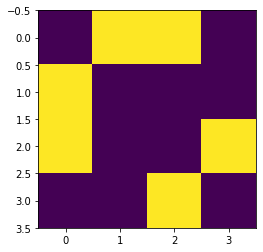

In [23]:
plt.imshow( edges_to_matrix(4,[[0,1],[0,2],[2,3]]) )

## Problem: check if graph is valid tree
A graph is a tree if the following 2 conditions are met:

(1) there are no "islands": by traversing through the graph we can reach every single node, and


(2) there are no cycles. When traversing through the graph, we won't encounter the same node twice.

In [59]:
def graph_is_valid_tree(num_nodes,edges):
    '''
    determines if the given graph specified by n (number of nodes) and edges is a tree
    '''
    
    neighbors = edges_to_al(num_nodes,edges)  # neighbors[i] contains the list of neighbors for node i
    
    parent = {0:-1}  # record seen nodes here, in the form of node:parent
    
    Q = deque([0])  # start BFS at node 0
    while Q:
        node = Q.popleft()
        for n in neighbors[node]:
            if parent[node]==n:
                # we've seen n before, but it's the trivial link
                continue
            if n in parent.keys():
                # we've seen n before, and it's not the trivial link 
                return False
            
            parent[n]=node  # record that we've seen node n, as well as its neighbor
            Q.append(n)  # add n  to the Q
            
    return len(parent)==num_nodes

In [60]:
# [[0,1],[0,2],[0,3],[1,4]] --> True
graph_is_valid_tree(5,[[0,1],[0,2],[0,3],[1,4]])

True

In [61]:
# [[0,1],[1,2],[2,0]] --> False, because there's a cycle
graph_is_valid_tree(4,[[0,1],[1,2],[2,0]])

False

## Problem: count the number of connected components in a graph

In [15]:
def count_num_ccs(edges, N):
    '''
    count the number of connected components in the graph determined by edges and N (the number of nodes)
    
    algoritm: 
    - create the adjacency list
    - create a list seen=[False, False, ...], indicating if a node has been visited
    - DFS starting from node 0. Each time we visit a node, we set its "seen" value to True
    - repeat for all nodes i
    '''
    
    # create adjacency list
    adj = [[] for _ in range(N)]
    for (a,b) in edges:
        adj[a].append(b)
        adj[b].append(a)
    
    seen = [False]*N
    
    def dfs(node):
        for neighbor in adj[node]:
            if not seen[neighbor]:
                seen[neighbor]=True
                dfs(neighbor)
            
    counter=0
    for i in range(N):
        if not seen[i]:
            counter+=1
            seen[i]=True
            dfs(i)  # visit all of the neighbors and set them to True as well
        
    return counter

In [21]:
count_num_ccs([[0,1],[1,2],[3,4]], 5)

2